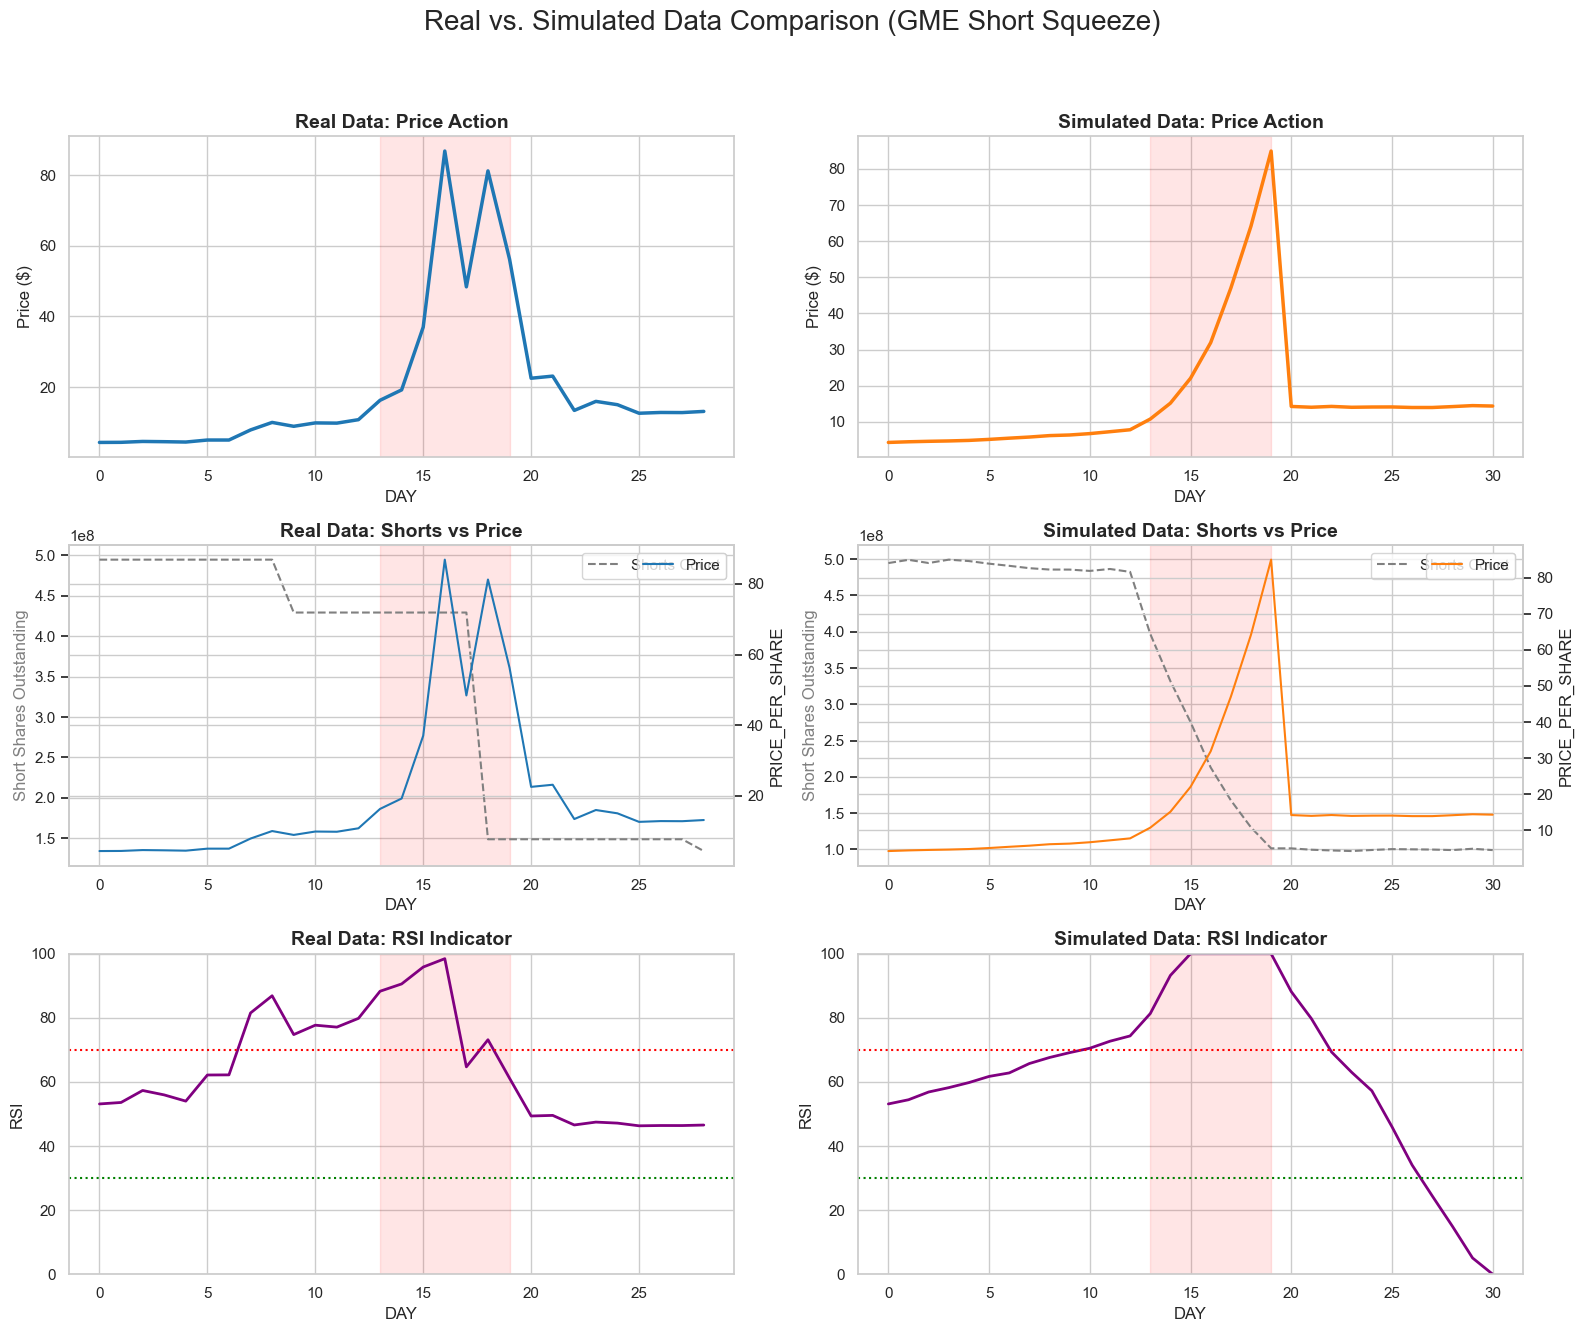

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle

# ---------------------------------------------------------
# 1. DATA PREPARATION (Replace with your actual file loading)
# ---------------------------------------------------------

# Load your datasets (assuming you have them saved as CSVs)
# real_df = pd.read_csv('GME_real.csv')
# sim_df = pd.read_csv('GME_simulated.csv')

# FOR DEMONSTRATION: I will reconstruct the DataFrames from your pasted text
from io import StringIO

real_data_str = """DAY,TICKER,COMPANY_NAME,TOTAL_SHARES,SHORTS,SIR,RSI,BF,ADV,PUBLIC,PRICE_PER_SHARE,SS
0,GME,GameStop,447908690,494679089,10.55,53.13,0.226,46895360.0,408656827,4.31,0
1,GME,GameStop,447908690,494679089,10.73,53.59,0.226,46093120.0,408656827,4.34,0
2,GME,GameStop,447908690,494679089,10.79,57.33,0.219,45827100.0,408656827,4.59,0
3,GME,GameStop,447908690,494679089,11.29,55.95,0.163,43828920.0,408656827,4.52,0
4,GME,GameStop,447908690,494679089,12.29,54.01,0.217,40253740.0,408656827,4.42,0
5,GME,GameStop,447908690,494679089,11.86,62.16,0.217,41723560.0,408656827,4.99,0
6,GME,GameStop,447908690,494679089,11.88,62.2,0.245,41636320.0,408656827,4.99,0
7,GME,GameStop,447908690,494679089,7.22,81.52,0.224,68535240.0,408656827,7.85,0
8,GME,GameStop,447908690,494679089,5.78,86.88,0.273,85640760.0,408656827,9.98,0
9,GME,GameStop,447908690,429253131,4.57,74.77,0.453,93841020.0,408656827,8.88,0
10,GME,GameStop,447908690,429253131,4.01,77.7,0.312,107146420.0,408656827,9.84,0
11,GME,GameStop,447908690,429253131,3.88,77.1,0.255,110517020.0,408656827,9.78,0
12,GME,GameStop,447908690,429253131,3.58,79.83,0.258,119785180.0,408656827,10.76,0
13,GME,GameStop,447908690,429253131,2.8,88.29,0.236,153086220.0,408656827,16.25,1
14,GME,GameStop,447908690,429253131,2.34,90.57,0.327,183494960.0,408656827,19.2,1
15,GME,GameStop,447908690,429253131,1.97,95.84,0.836,217960120.0,408656827,36.99,1
16,GME,GameStop,447908690,429253131,1.83,98.45,0.509,234846280.0,408656827,86.88,1
17,GME,GameStop,447908690,429253131,1.75,64.7,0.42,244761160.0,408656827,48.4,1
18,GME,GameStop,447908690,148751085,0.59,73.16,0.36,253687500.0,408656827,81.25,1
19,GME,GameStop,447908690,148751085,0.57,61.15,0.28,259779400.0,408656827,56.25,1
20,GME,GameStop,447908690,148751085,0.54,49.37,0.2,273411520.0,408656827,22.5,0
21,GME,GameStop,447908690,148751085,0.53,49.56,0.15,280958920.0,408656827,23.1,0
22,GME,GameStop,447908690,148751085,0.51,46.57,0.1,292233140.0,408656827,13.38,0
23,GME,GameStop,447908690,148751085,0.48,47.47,0.09,307276280.0,408656827,15.94,0
24,GME,GameStop,447908690,148751085,0.48,47.15,0.04,311117340.0,408656827,15.0,0
25,GME,GameStop,447908690,148751085,0.47,46.31,0.03,313504360.0,408656827,12.58,0
26,GME,GameStop,447908690,148751085,0.47,46.4,0.02,319383220.0,408656827,12.8,0
27,GME,GameStop,447908690,148751085,0.51,46.39,0.02,293094220.0,408656827,12.77,0
28,GME,GameStop,447908690,134162036,0.48,46.55,0.02,277265400.0,408656827,13.1,0"""

sim_data_str = """DAY,TICKER,COMPANY_NAME,TOTAL_SHARES,SHORTS,SIR,RSI,BF,ADV,PUBLIC,PRICE_PER_SHARE,SS
0,GME,GameStop Corp.,447908690,494679089,10.55,53.13,0.226,46895360.0,408656827,4.31,0
1,GME,GameStop Corp.,447908690,499138268,10.58,54.44,0.228,47194924.11,408656827,4.49,0
2,GME,GameStop Corp.,447908690,494726720,10.42,56.86,0.231,47497445.23,408656827,4.62,0
3,GME,GameStop Corp.,447908690,499376259,10.48,58.22,0.235,47635712.76,408656827,4.72,0
4,GME,GameStop Corp.,447908690,497421124,10.39,59.8,0.235,47868532.55,408656827,4.87,0
5,GME,GameStop Corp.,447908690,493834657,10.27,61.72,0.233,48074235.92,408656827,5.15,0
6,GME,GameStop Corp.,447908690,490868427,10.15,62.81,0.233,48378629.05,408656827,5.49,0
7,GME,GameStop Corp.,447908690,487633841,9.98,65.74,0.229,48840159.72,408656827,5.8,0
8,GME,GameStop Corp.,447908690,485728302,9.87,67.62,0.225,49189762.33,408656827,6.2,0
9,GME,GameStop Corp.,447908690,485681448,9.78,69.14,0.221,49641515.38,408656827,6.37,0
10,GME,GameStop Corp.,447908690,483852479,9.69,70.51,0.221,49935412.64,408656827,6.75,0
11,GME,GameStop Corp.,447908690,486514953,9.66,72.7,0.225,50387500.21,408656827,7.28,0
12,GME,GameStop Corp.,447908690,482510862,9.56,74.35,0.222,50458397.72,408656827,7.82,0
13,GME,GameStop Corp.,447908690,397041347,6.37,81.32,0.304,62350197.38,408656827,10.78,1
14,GME,GameStop Corp.,447908690,331889871,4.41,93.23,0.413,75285061.6,408656827,15.18,1
15,GME,GameStop Corp.,447908690,275511218,2.86,100.0,0.496,96481280.3,408656827,22.08,1
16,GME,GameStop Corp.,447908690,212935172,1.79,100.0,0.603,119236059.61,408656827,31.93,1
17,GME,GameStop Corp.,447908690,167722687,1.17,100.0,0.763,143841116.25,408656827,47.02,1
18,GME,GameStop Corp.,447908690,130327133,0.7,100.0,0.9,185371106.63,408656827,64.18,1
19,GME,GameStop Corp.,447908690,101482548,0.44,100.0,0.9,232849785.48,408656827,84.97,1
20,GME,GameStop Corp.,447908690,101457363,0.58,88.18,0.679,176324544.94,408656827,14.27,0
21,GME,GameStop Corp.,447908690,99555764,0.73,79.74,0.528,135516768.42,408656827,14.05,0
22,GME,GameStop Corp.,447908690,98557388,1.0,69.34,0.386,98174429.87,408656827,14.28,0
23,GME,GameStop Corp.,447908690,97728526,1.41,63.0,0.264,69412290.2,408656827,14.04,0
24,GME,GameStop Corp.,447908690,99180618,1.83,57.24,0.214,54234806.65,408656827,14.11,0
25,GME,GameStop Corp.,447908690,100400302,2.41,46.01,0.177,41663159.62,408656827,14.13,0
26,GME,GameStop Corp.,447908690,100107566,3.37,34.06,0.144,29744452.13,408656827,13.98,0
27,GME,GameStop Corp.,447908690,99776855,4.26,24.43,0.1,23439028.74,408656827,13.98,0
28,GME,GameStop Corp.,447908690,99071245,5.79,14.97,0.075,17103414.83,408656827,14.23,0
29,GME,GameStop Corp.,447908690,100903854,7.86,5.08,0.053,12832267.12,408656827,14.5,0
30,GME,GameStop Corp.,447908690,99034658,10.29,0.0,0.041,9620762.54,408656827,14.38,0

"""

real_df = pd.read_csv(StringIO(real_data_str))
sim_df = pd.read_csv(StringIO(sim_data_str))

# ---------------------------------------------------------
# 2. PLOTTING SETUP
# ---------------------------------------------------------
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})
colors = {'real': '#1f77b4', 'sim': '#ff7f0e', 'squeeze': '#2ca02c'}

fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle('Real vs. Simulated Data Comparison (GME Short Squeeze)', fontsize=20, y=0.98)

# Helper function to add squeeze shading
def add_squeeze_shade(ax, df, color='red', alpha=0.1):
    squeeze_days = df[df['SS'] == 1]['DAY']
    if not squeeze_days.empty:
        start = squeeze_days.min()
        end = squeeze_days.max()
        # Add shading for squeeze period
        ax.axvspan(start, end, color=color, alpha=alpha, label='Squeeze Period (SS=1)')

# ---------------------------------------------------------
# PLOT 1: Price Action Comparison
# ---------------------------------------------------------
# Real Data
sns.lineplot(data=real_df, x='DAY', y='PRICE_PER_SHARE', ax=axes[0,0], color=colors['real'], linewidth=2.5)
add_squeeze_shade(axes[0,0], real_df)
axes[0,0].set_title('Real Data: Price Action', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Price ($)')

# Simulated Data
sns.lineplot(data=sim_df, x='DAY', y='PRICE_PER_SHARE', ax=axes[0,1], color=colors['sim'], linewidth=2.5)
add_squeeze_shade(axes[0,1], sim_df)
axes[0,1].set_title('Simulated Data: Price Action', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Price ($)')

# ---------------------------------------------------------
# PLOT 2: Shorts Covering Analysis
# ---------------------------------------------------------
# Real Data
ax2 = axes[1,0].twinx()
sns.lineplot(data=real_df, x='DAY', y='SHORTS', ax=axes[1,0], color='grey', linestyle='--', label='Shorts Count')
sns.lineplot(data=real_df, x='DAY', y='PRICE_PER_SHARE', ax=ax2, color=colors['real'], label='Price')
add_squeeze_shade(axes[1,0], real_df)
axes[1,0].set_title('Real Data: Shorts vs Price', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Short Shares Outstanding', color='grey')

# Simulated Data
ax2_sim = axes[1,1].twinx()
sns.lineplot(data=sim_df, x='DAY', y='SHORTS', ax=axes[1,1], color='grey', linestyle='--', label='Shorts Count')
sns.lineplot(data=sim_df, x='DAY', y='PRICE_PER_SHARE', ax=ax2_sim, color=colors['sim'], label='Price')
add_squeeze_shade(axes[1,1], sim_df)
axes[1,1].set_title('Simulated Data: Shorts vs Price', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Short Shares Outstanding', color='grey')

# ---------------------------------------------------------
# PLOT 3: RSI Evolution
# ---------------------------------------------------------
# Real Data
sns.lineplot(data=real_df, x='DAY', y='RSI', ax=axes[2,0], color='purple', linewidth=2)
axes[2,0].axhline(70, color='red', linestyle=':', label='Overbought (70)')
axes[2,0].axhline(30, color='green', linestyle=':', label='Oversold (30)')
add_squeeze_shade(axes[2,0], real_df)
axes[2,0].set_title('Real Data: RSI Indicator', fontsize=14, fontweight='bold')
axes[2,0].set_ylabel('RSI')
axes[2,0].set_ylim(0, 100)

# Simulated Data
sns.lineplot(data=sim_df, x='DAY', y='RSI', ax=axes[2,1], color='purple', linewidth=2)
axes[2,1].axhline(70, color='red', linestyle=':', label='Overbought (70)')
axes[2,1].axhline(30, color='green', linestyle=':', label='Oversold (30)')
add_squeeze_shade(axes[2,1], sim_df)
axes[2,1].set_title('Simulated Data: RSI Indicator', fontsize=14, fontweight='bold')
axes[2,1].set_ylabel('RSI')
axes[2,1].set_ylim(0, 100)

# Final Layout Adjustments
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("gme_comparison_plots.png", dpi=300)
plt.show()
